# Meshes

This tutorial gives a quick overview about the mesh types currently available in [`jInv`](https://github.com/JuliaInv/jInv.jl) and their use.

Currently, all mesh types assume a given recangular domain, $\Omega \subset \mathbb{R}^d$, where $d=2,3$. 

In [78]:
using PyPlot
using jInv.Mesh
using jInv.Vis

## Regular Meshes

Regular meshes divide the domain into equally sized rectangular cells. Currently, Regular meshes are available in 2D and 3D and can be generated by providing information on the domain size and the number of cells in each coordinate dimension. 

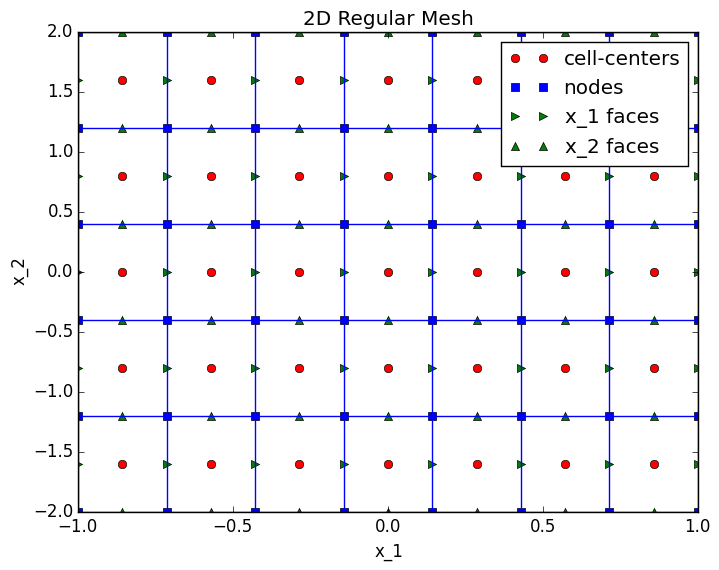

PyObject <matplotlib.text.Text object at 0x330dd1790>

In [79]:
# create a 2D regular mesh
domain2D = [-1 1 -2 2]
n2D      = [7 5]
M2D      = getRegularMesh(domain2D,n2D)

xc = getCellCenteredGrid(M2D)
xn = getNodalGrid(M2D)
xf1,xf2 = getFaceGrids(M2D)

plot(xc[:,1],xc[:,2],"or")
plot(xn[:,1],xn[:,2],"sb")
plot(xf1[:,1],xf1[:,2],">g")
plot(xf2[:,1],xf2[:,2],"^g")
legend(("cell-centers","nodes","x_1 faces","x_2 faces"))
plotGrid(M2D)
xlabel("x_1")
ylabel("x_2")
title("2D Regular Mesh")



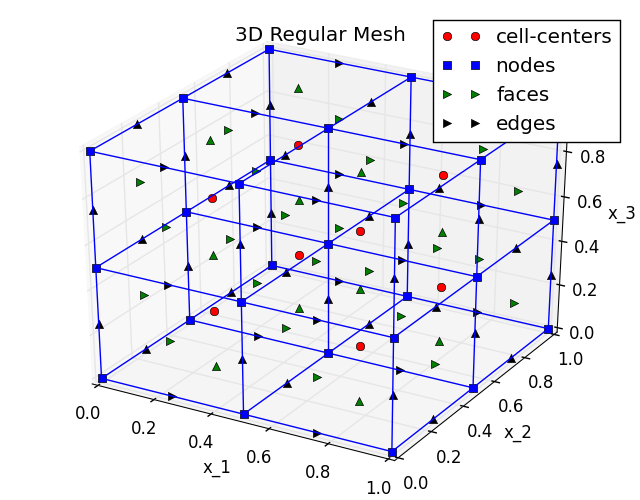

PyObject <matplotlib.text.Text object at 0x321d50f10>

In [80]:
# create a 3D regular mesh
domain3D = [0 1 0 1 0 1]
n3D      = [2 2 2]
M3Dreg   = getRegularMesh(domain3D,n3D)

xc = getCellCenteredGrid(M3Dreg)
xn = getNodalGrid(M3Dreg)
xf1,xf2,xf3 = getFaceGrids(M3Dreg)
xe1,xe2,xe3 = getEdgeGrids(M3Dreg)

plot3D(xc[:,1],xc[:,2],xc[:,3],"or")
plot3D(xn[:,1],xn[:,2],xn[:,3],"sb")
plot3D(xf1[:,1],xf1[:,2],xf1[:,3],">g")
plot3D(xe1[:,1],xe1[:,2],xe1[:,3],">k")
legend(("cell-centers","nodes","faces","edges"))
plot3D(xf2[:,1],xf2[:,2],xf2[:,3],">g")
plot3D(xf3[:,1],xf3[:,2],xf3[:,3],"^g")
plot3D(xe2[:,1],xe2[:,2],xe2[:,3],"^k")
plot3D(xe3[:,1],xe3[:,2],xe3[:,3],"^k")

plotGrid(M3Dreg)
title("3D Regular Mesh")
xlabel("x_1")
ylabel("x_2")
zlabel("x_3")


## Tensor Meshes

Tensor meshes have the same logical structure (i.e. neighboorhood relation) as regular meshes, however, the edge lengths is allowed to vary along the coordinate dimensions. To define a tensor mesh, you need to provide the edge length for all dimensions

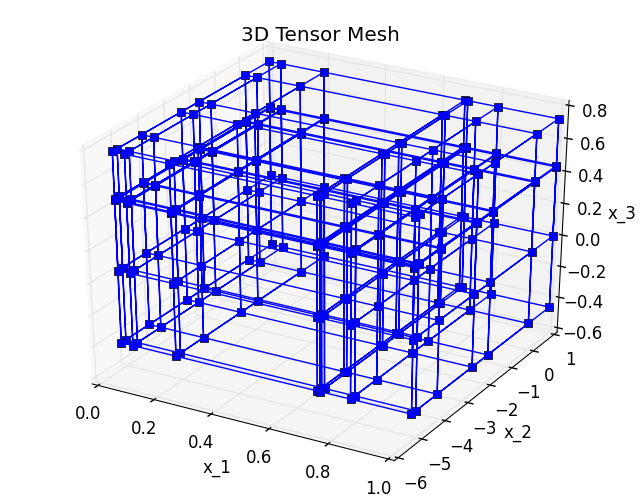

PyObject <matplotlib.text.Text object at 0x330178a50>

In [81]:
h1 = rand(6); h1 /= sum(h1)
h2 = randn(6); h2/=sum(h2)
h3 = randn(4); h3/sum(h3)
x0 = [0;0;0]

M3Dten = getTensorMesh3D(h1,h2,h3,x0)

xc = getCellCenteredGrid(M3Dten)
xn = getNodalGrid(M3Dten)
xf1,xf2,xf3 = getFaceGrids(M3Dten)
xe1,xe2,xe3 = getEdgeGrids(M3Dten)

plot3D(xn[:,1],xn[:,2],xn[:,3],"sb")

plotGrid(M3Dten)
title("3D Tensor Mesh")
xlabel("x_1")
ylabel("x_2")
zlabel("x_3")

## OcTree Meshes

OcTrees provide an efficient way of generating spatially adaptive discretizations. They can be used in many ways, for example, for local refinement or approximating non-rectangular domains. OcTrees are defined by a base mesh (the fine mesh) which is a regular mesh whose number of cells is a power of 2. From this base mesh, an OcTree is defined by grouping together some blocks whose size is again a power of two. A minimal example is as follows:

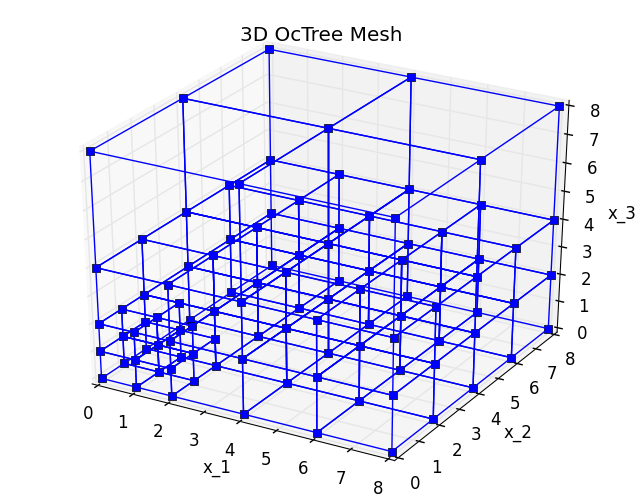

PyObject <matplotlib.text.Text object at 0x332639290>

In [83]:
using JOcTree;

n = [8;8;8]
h = [1;1;1.]

# specify the number of fine mesh cells per coarse mesh block
bsz  = zeros(tuple(n...))
bsz[1:2:end,1:2:end,1:2:end] = 2
bsz[1:2,1:2,1:2] = 1
bsz[1:end,1:end,5:end] = 0
bsz[1,1,5] = 4
bsz[5,1,5] = 4
bsz[1,5,5] = 4
bsz[5,5,5] = 4

# the data structure of OcTrees uses 3D sparse matrices
S    = sparse3(n)
S.SV = sparse(vec(bsz))
M    = getOcTreeMeshFV(S,h);

# the syntax of generating the nodal grid and plotting does not change
xn = getNodalGrid(M)
plot3D(xn[:,1],xn[:,2],xn[:,3],"sb")
plotGrid(M)
title("3D OcTree Mesh")
xlabel("x_1")
ylabel("x_2")
zlabel("x_3")